## Lab 1: Hybrid mergesort with insertion sort ##


Defining insertion_sort which sorts an array and counts the number of key comparisons made during the process.

The function takes two arguments:

- arr: The array to be sorted.
- key_comparisons: An integer to track the number of comparisons.

Returns a tuple containing:
- The sorted array.
- The total count of key comparisons.

In [37]:
def insertion_sort(arr,key_comparisons):
    if len(arr)<= 1:
        return arr, key_comparisons
    for i in range(1, len(arr)):
        for j in range(i,0,-1):
            key_comparisons += 1
            if arr[j]< arr[j-1]:
                arr[j], arr[j-1] = arr[j-1], arr[j]
            else:
                break
        
    return arr, key_comparisons

Defining the merge function which is the is used to merge arrays in merge_sort. It takes one extra argument: key_comparisons to track the number of comparisons.

In [38]:
def merge(left, right, key_comparisons):
    result = []
    leftl = len(left)
    rightl = len(right)
    i,j = 0,0 
    while i<leftl and j < rightl:
        if left[i] < right[j]:
            result.append(left[i])
            i+= 1
        else:
            result.append(right[j])
            j+= 1
        key_comparisons += 1
    if i < leftl:
        result.extend(left[i:])
    if j < rightl:
        result.extend(right[j:])
    
    return result, key_comparisons

Mergesort_hybrid, is a hybrid sorting algorithm that combines the principles of Merge Sort and Insertion Sort to improve performance.

The function takes an array and a threshold value as input, along with a key_comparisons counter.

Algorithm:

Base Case and Switching: It first checks if the size of the array (N) is less than or equal to the threshold. If so, it calls insertion_sort (which was described previously) to sort the small sub-array. This is the key optimization, as Insertion Sort is generally more efficient for very small lists due to less overhead from recursion.

Recursive Division: If the array size is larger than the threshold, the function recursively divides the array into two halves, left and right.

Recursive Sorting: It then calls itself (mergesort_hybrid) on each of these two halves.

Merging: Once the recursive calls return, the merge function is used to combine the two sorted halves (left and right) back into a single sorted array. The key_comparisons from the sub-arrays are also added to the total count during this process.

In [39]:
def mergesort_hybrid(arr, threshold, key_comparisons):
    N = len(arr)
    #Base case
    if N <= threshold:
        return insertion_sort(arr, key_comparisons)
    mid = N//2
    left,key_compL = mergesort_hybrid(arr[:mid], threshold, key_comparisons)
    right, key_compR = mergesort_hybrid(arr[mid:], threshold, key_comparisons)

    return merge(left, right, key_comparisons + key_compR + key_compL)


### Analysing key comparisons with input size of an array ranging from 1000 to 10 million elements, with a fixed threshold os S = 10. ###

In [33]:
import random
sizes = [1000, 50000, 250000, 500000, 1000000, 5000000, 10000000]
test_arrays = {}
for size in sizes:
    test_arrays[size] = random.sample(range(1, size + 1), size)

# Measure comparisons for each size
results = {}
times = {}

In [34]:
import time
S = 10
for size in sizes:
    print(f"Testing size: {size:,}")
    
    comparison_count = 0
    
    arr_copy = test_arrays[size].copy()
    
    start_time = time.time()
    sorted_arr, comparison_count = mergesort_hybrid(arr_copy, S, 0)
    end_time = time.time()
    
    results[size] = comparison_count
    times[size] = end_time - start_time
    
    print(f"  Comparisons: {comparison_count:,}")
    print(f"  Time: {end_time - start_time:.4f} seconds")

Testing size: 1,000
  Comparisons: 9,113
  Time: 0.0194 seconds
Testing size: 50,000
  Comparisons: 728,997
  Time: 0.0993 seconds
Testing size: 250,000
  Comparisons: 4,267,855
  Time: 0.4389 seconds
Testing size: 500,000
  Comparisons: 9,035,711
  Time: 1.1667 seconds
Testing size: 1,000,000
  Comparisons: 19,070,423
  Time: 2.4509 seconds
Testing size: 5,000,000
  Comparisons: 108,204,196
  Time: 17.3156 seconds
Testing size: 10,000,000
  Comparisons: 226,409,007
  Time: 29.1896 seconds


#### This code uses Matplotlib to generate a line graph. It visualizes the number of key comparisons versus the input size of an array ranging from 1000 to 10 million elements, with a fixed threshold of S = 10. ####

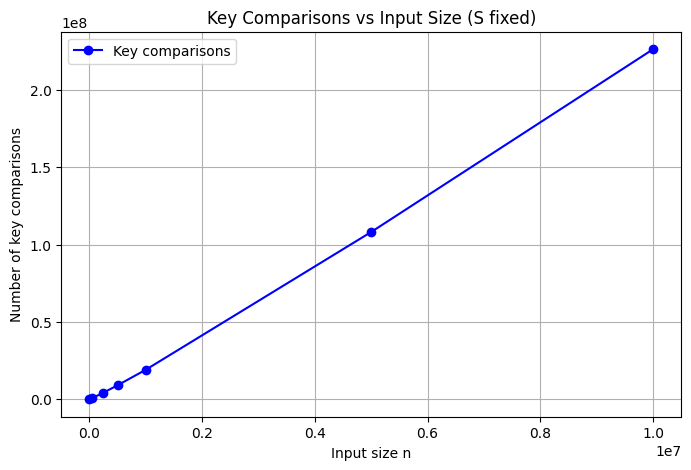

In [35]:
import matplotlib.pyplot as plt

x = list(results.keys())
y = list(results.values())

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Key comparisons")

plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Key Comparisons vs Input Size (S fixed)")
plt.legend()
plt.grid(True)
plt.show()

This code aims to Compare your empirical results with your theoretical analysis of the time complexity.
It visualizes the performance of a sorting algorithm by plotting the Number of key comparisons (Y-axis) against the Input size n (X-axis).



The graph shows four distinct lines:

A solid blue line with markers represents the Actual Key Comparisons of the algorithm.

Dashed lines represent theoretical performance complexities for comparison:

A green line for O(n) - Linear complexity.

An orange line for O(n log n) - Linearithmic complexity.

A red line for O(n²) - Quadratic complexity.

The plot demonstrates that the actual key comparisons of the algorithm follow a trend that is far more efficient than the quadratic O(n²), with its performance curve staying close to or below the linearithmic O(n log n) complexity line.

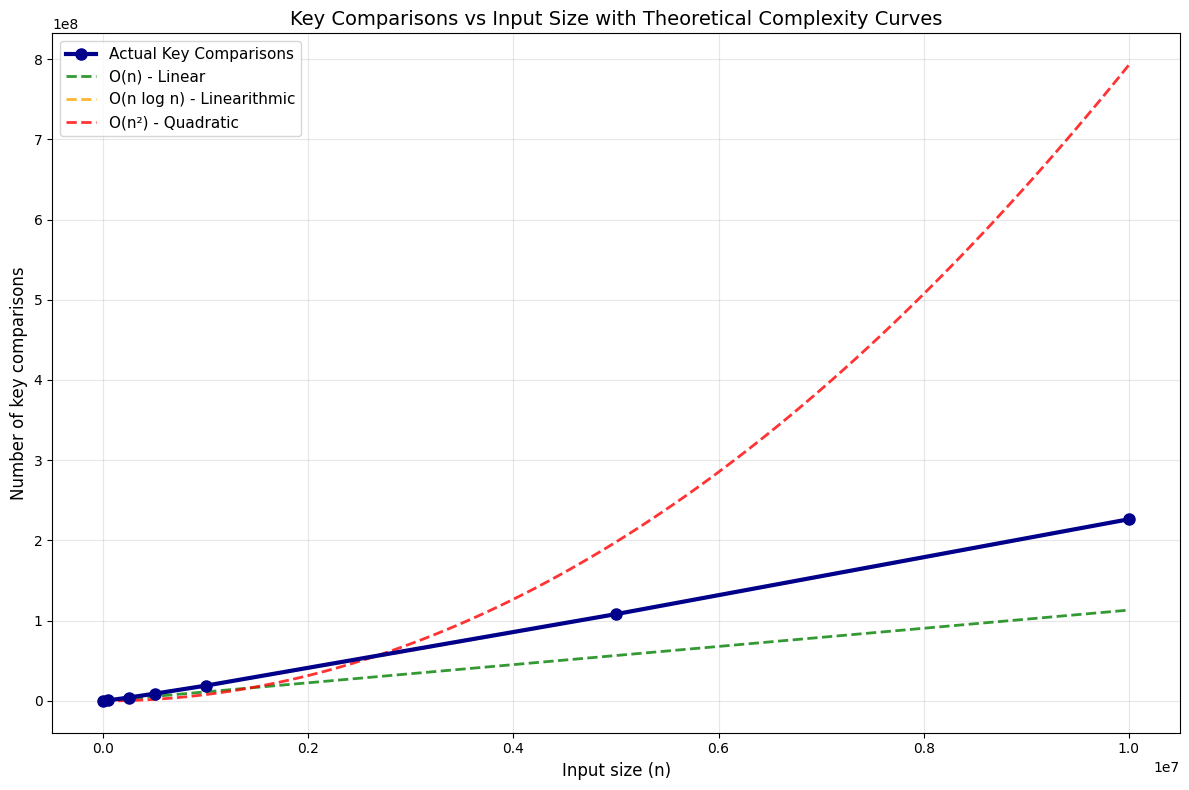

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = list(results.keys())
y = list(results.values())

x_theory = np.linspace(min(x), max(x), 100)

max_n = max(x)
max_comparisons = max(y)

# O(n)
y_linear = x_theory
linear_scale = max_comparisons / (2 * max_n)  
y_linear_scaled = y_linear * linear_scale

# O(n log n)
y_nlogn = x_theory * np.log2(x_theory)
nlogn_scale = max_comparisons / (max_n * np.log2(max_n))
y_nlogn_scaled = y_nlogn * nlogn_scale

# O(n²)
y_quadratic = x_theory ** 2
quad_scale = max_comparisons / (max_n ** 2) * 3.5 
y_quadratic_scaled = y_quadratic * quad_scale

plt.figure(figsize=(12, 8))

# Plot actual data 
plt.plot(x, y, marker='o', linestyle='-', linewidth=3, markersize=8, 
         color='darkblue', label="Actual Key Comparisons", zorder=5)

# Plot theoretical complexity curves
plt.plot(x_theory, y_linear_scaled, linestyle='--', linewidth=2, 
         color='green', label="O(n) - Linear", alpha=0.8)
plt.plot(x_theory, y_nlogn_scaled, linestyle='--', linewidth=2, 
         color='orange', label="O(n log n) - Linearithmic", alpha=0.8)
plt.plot(x_theory, y_quadratic_scaled, linestyle='--', linewidth=2, 
         color='red', label="O(n²) - Quadratic", alpha=0.8)

# Enhance the plot appearance
plt.xlabel("Input size (n)", fontsize=12)
plt.ylabel("Number of key comparisons", fontsize=12)
plt.title("Key Comparisons vs Input Size with Theoretical Complexity Curves", fontsize=14)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


## Merge Sort with Hybrid Approach: Complexity Analysis ##

Combined Complexity:
$T(n,S)=O(nlog(n/S))+O(n/S . S^2)$


1. 1st term $O(nlog(n/S))$
- We stop merging once subarray size S
- That reduces recursion depth: Depth=log(n)−log(S)=log(n/S).
- At each level we still process n elements during merging
- Total merge cost = O(nlog(n/S))


2. Second term: $O(n/S . S^2)$
- At the leaves, instead of recursing, we run Insertion Sort on each subarray of size S
- One insertion sort costs $O(n^2)$ comparisons in the worst case.
- We have $n/S$ nymber of subarrays to do insertion sort on
- Total insertion sort cost = $O(n/S . S^2)$
---
When S is small (chosen 10), the first term dominates 
- $T(n,10) = O(nlogn) + O(n) ≈ O(nlogn)$.

Therefore we see the algorithm grows by $O(nlogn)$.



### Analyze the performance by testing different threshold values using the same size of the array ###

The code performs the following actions:

It iterates through a list of predefined threshold values, S = [5, 10, 15, 20, 50, 100].

For each threshold, it runs the mergesort_hybrid function on a large array of 250,000 elements.

During each run, it measures and records two metrics:

The total number of key comparisons.

The execution time in seconds.

It stores the results in the results_s dictionary, where each key is a threshold value and the corresponding value is the number of comparisons.

In [37]:
import time
S = [5, 10, 15, 20, 50, 100]
results_s = {}
for s in S:
    print(f"Testing S: {s}")
    
    comparison_count = 0
    
    arr_copy = test_arrays[250000].copy()
    
    start_time = time.time()
    sorted_arr, comparison_count = mergesort_hybrid(arr_copy, s, 0)
    end_time = time.time()
    
    results_s[s] = comparison_count
    
    print(f"  Comparisons: {comparison_count:,}")
    print(f"  Time: {end_time - start_time:.4f} seconds")

Testing S: 5
  Comparisons: 4,182,689
  Time: 0.8629 seconds
Testing S: 10
  Comparisons: 4,267,855
  Time: 0.6374 seconds
Testing S: 15
  Comparisons: 4,471,729
  Time: 0.4778 seconds
Testing S: 20
  Comparisons: 4,555,796
  Time: 0.5328 seconds
Testing S: 50
  Comparisons: 5,298,774
  Time: 0.4789 seconds
Testing S: 100
  Comparisons: 6,974,371
  Time: 0.5838 seconds


We plot experimental data (the number of key comparisons for different thresholds S) and compares it against a theoretical performance curve based on the algorithm's complexity, $T(n,S)=O(nlog(n/S))+O(n/S​⋅S^2)$

Visualization: It uses matplotlib to create an enhanced plot that is specifically styled for clarity and readability.

The experimental results are displayed as a prominent blue line.

The theoretical curve is shown as a dashed red line.

An annotation is included to highlight the optimal threshold S where the minimum number of comparisons was observed.

Key observations:
- For larger S, the algorithm performs insertion sort for a larger arrays, and the term $O(S/n​⋅S^2)$ will dominate $T(n,S)$
- $T(n,n)=O(nlog(1))+O(n⋅n)=O(n^2).$
- The larger the S, the more the time complexity transitions to $O(n^2)$

We can now easily identify the optimal threshold is S = 5 for key comparisons

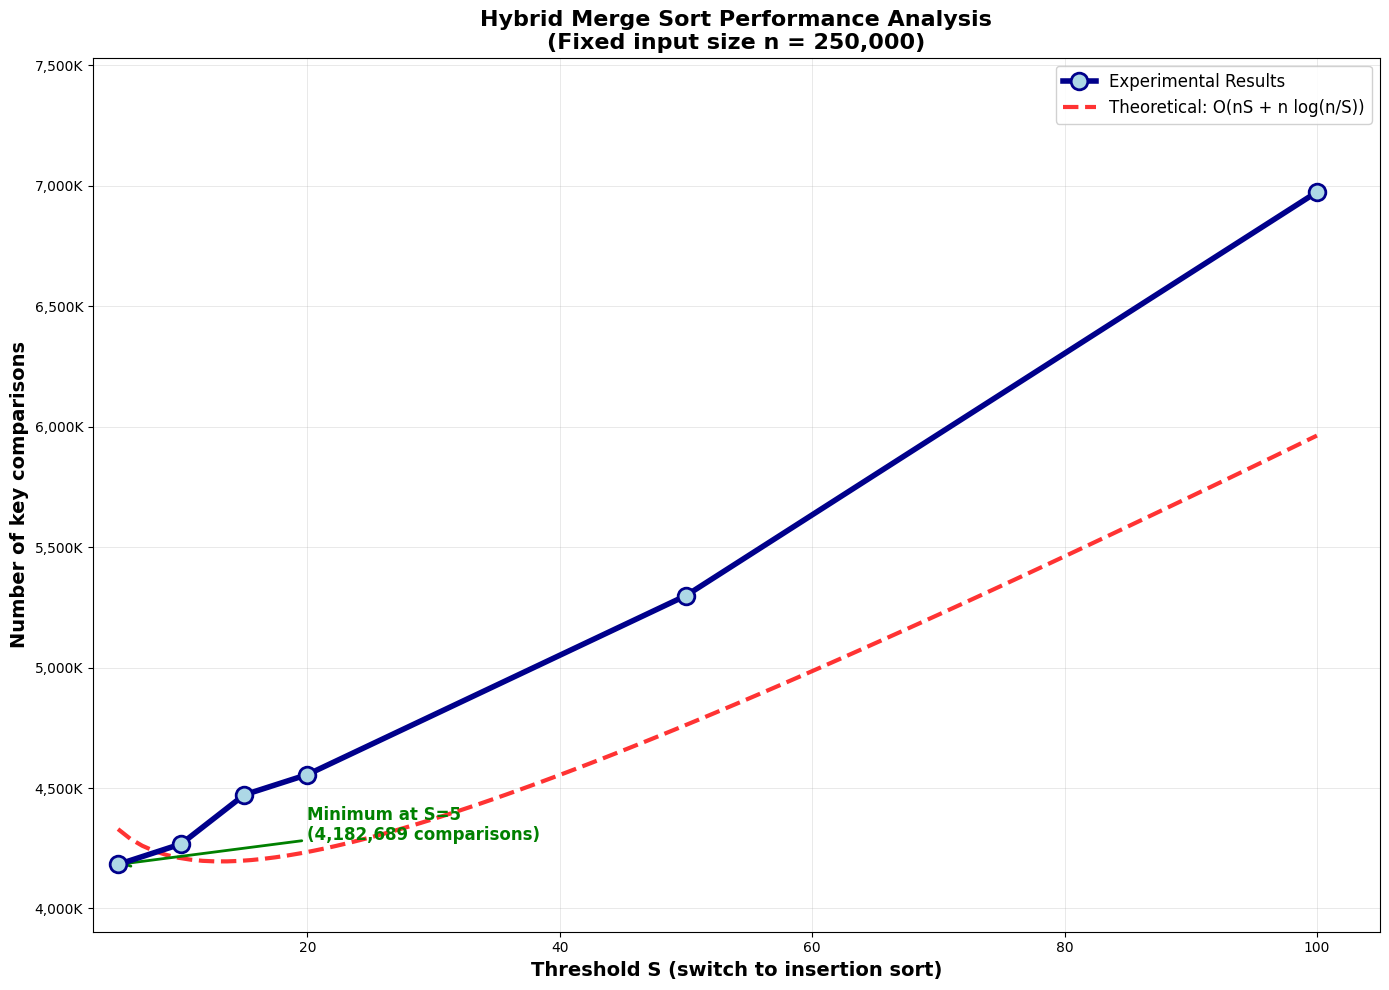

HYBRID MERGE SORT ANALYSIS
Fixed input size (n): 250,000
Threshold values tested: [5, 10, 15, 20, 50, 100]

Experimental Results:
S =   5: 4,182,689 comparisons
S =  10: 4,267,855 comparisons
S =  15: 4,471,729 comparisons
S =  20: 4,555,796 comparisons
S =  50: 5,298,774 comparisons
S = 100: 6,974,371 comparisons

Optimal threshold: S = 5
Minimum comparisons: 4,182,689


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Your experimental data
S = [5, 10, 15, 20, 50, 100]
x = S
y = list(results_s.values())

# Create theoretical analysis curves
S_theory = np.linspace(min(S), max(S), 100)
n = 250000  # Your fixed input size

# Theoretical hybrid merge sort complexity: O(nS + n*log(n/S))
max_comparisons = max(y)
min_comparisons = min(y)

# Estimate constants to fit your data scale
c1 = (max_comparisons - min_comparisons) / (n * (max(S) - min(S)))  
c2 = min_comparisons / (n * np.log2(n / min(S)))  

theoretical_comparisons = c1 * n * S_theory + c2 * n * np.log2(n / S_theory)

# Create the enhanced plot
plt.figure(figsize=(14, 10))

# Plot your actual experimental data (prominent)
plt.plot(x, y, marker='o', linestyle='-', linewidth=4, markersize=12, 
         color='darkblue', label="Experimental Results", zorder=5, markerfacecolor='lightblue', markeredgewidth=2)

# Plot theoretical curve
plt.plot(S_theory, theoretical_comparisons, linestyle='--', linewidth=3, 
         color='red', label="Theoretical: O(nS + n log(n/S))", alpha=0.8)

# Add annotations for key insights
optimal_S = x[y.index(min(y))]
plt.annotate(f'Minimum at S={optimal_S}\n({min(y):,} comparisons)', 
             xy=(optimal_S, min(y)), xytext=(optimal_S+15, min(y)+100000),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=12, color='green', fontweight='bold')

# Enhanced styling
plt.xlabel("Threshold S (switch to insertion sort)", fontsize=14, fontweight='bold')
plt.ylabel("Number of key comparisons", fontsize=14, fontweight='bold')
plt.title(f"Hybrid Merge Sort Performance Analysis\n(Fixed input size n = {n:,})", 
          fontsize=16, fontweight='bold')

# Format y-axis for better readability
plt.ticklabel_format(style='plain', axis='y')
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{int(tick/1000):,}K' for tick in y_ticks])

# Add grid and legend
plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)

# Set reasonable axis limits
plt.xlim(min(S) - 2, max(S) + 5)
comparison_range = max(y) - min(y)
plt.ylim(min(y) - comparison_range*0.1, max(y) + comparison_range*0.2)

plt.tight_layout()
plt.show()

# Print analysis
print("HYBRID MERGE SORT ANALYSIS")
print("=" * 50)
print(f"Fixed input size (n): {n:,}")
print(f"Threshold values tested: {S}")
print("\nExperimental Results:")
for s, comparisons in zip(x, y):
    print(f"S = {s:3d}: {comparisons:,} comparisons")

print(f"\nOptimal threshold: S = {optimal_S}")
print(f"Minimum comparisons: {min(y):,}")


Using different sizes of input datasets, We now study how to determine an optimal value of S for the best performance of this hybrid algorithm

The following code loops through the different sizes and for each size we analyse the number of key comparisons done and the CPU time taken for each value of S from 5-100.

We noticed that S=5 is the best for minimising the number of comparisons since insertion sort takes more comparisons than mergesort would need for the same subarray
- Worst-case: $O(n^2)$ vs $O(n \log n)$ key comparisons

So as S increases, insertion sort adds extra comparisons beyond what mergesort would need.

### Studying how to determine optimal value of $S$ for best performance ###

1. Analysing based on key comparisons done
2. Analysing based on CPU time taken

In [ ]:
import time
from collections import defaultdict

# Define the parameters  
sizes = [1000, 50000, 250000, 500000, 1000000]
S = [5, 10, 15, 20, 50, 100]

# Initialize the results structure
results_by_size = {}
timing_results = {}  

print("COMPREHENSIVE HYBRID MERGE SORT TESTING")
print("=" * 55)
print(f"Testing {len(sizes)} input sizes × {len(S)} threshold values = {len(sizes) * len(S)} total experiments")
print()

# Main data collection loop
for n in sizes:
    print(f"TESTING INPUT SIZE: {n:,}")
    print("-" * 40)
    
    # Initialize dictionaries for this input size
    results_by_size[n] = {}
    timing_results[n] = {}
    
    # Get the test array for this size
    arr_copy = test_arrays[n].copy() 
    
    for s in S:
        print(f"  Testing S: {s:2d} ", end="")
        
        # Make a fresh copy for each test
        test_arr = arr_copy.copy()
        
        # Run the hybrid merge sort
        start_time = time.time()
        sorted_arr, comparison_count = mergesort_hybrid(test_arr, s, 0)
        end_time = time.time()
        
        execution_time = end_time - start_time
        
        # Store results
        results_by_size[n][s] = comparison_count
        timing_results[n][s] = execution_time
        
        print(f"→ {comparison_count:8,} comparisons, {execution_time:.4f}s")
    
    # Find optimal S for this input size
    best_s = min(results_by_size[n], key=results_by_size[n].get)
    best_comparisons = results_by_size[n][best_s]
    
    print(f"  Best for n={n:,}: S={best_s} ({best_comparisons:,} comparisons)")
    print()

print("DATA COLLECTION COMPLETE!")
print("=" * 30)

# Display summary
print("\nSUMMARY OF RESULTS:")
print("Input Size    | Optimal S | Min Comparisons")
print("-" * 45)
for n in sizes:
    best_s = min(results_by_size[n], key=results_by_size[n].get)
    best_comparisons = results_by_size[n][best_s]
    print(f"{n:9,} | {best_s:8d} | {best_comparisons:13,}")

print(f"\nResults structure created: results_by_size")
print(f"Available sizes: {list(results_by_size.keys())}")
print(f"Available S values: {S}")

COMPREHENSIVE HYBRID MERGE SORT TESTING
Testing 5 input sizes × 6 threshold values = 30 total experiments

TESTING INPUT SIZE: 1,000
----------------------------------------
  Testing S:  5 →    8,795 comparisons, 0.0017s
  Testing S: 10 →    9,113 comparisons, 0.0009s
  Testing S: 15 →    9,508 comparisons, 0.0009s
  Testing S: 20 →   10,324 comparisons, 0.0009s
  Testing S: 50 →   12,908 comparisons, 0.0010s
  Testing S: 100 →   20,450 comparisons, 0.0016s
  Best for n=1,000: S=5 (8,795 comparisons)

TESTING INPUT SIZE: 50,000
----------------------------------------
  Testing S:  5 →  718,441 comparisons, 0.0759s
  Testing S: 10 →  728,997 comparisons, 0.0728s
  Testing S: 15 →  770,117 comparisons, 0.0698s
  Testing S: 20 →  770,117 comparisons, 0.0700s
  Testing S: 50 → 1,142,036 comparisons, 0.0935s
  Testing S: 100 → 1,706,937 comparisons, 0.1321s
  Best for n=50,000: S=5 (718,441 comparisons)

TESTING INPUT SIZE: 250,000
----------------------------------------
  Testing S:  5 

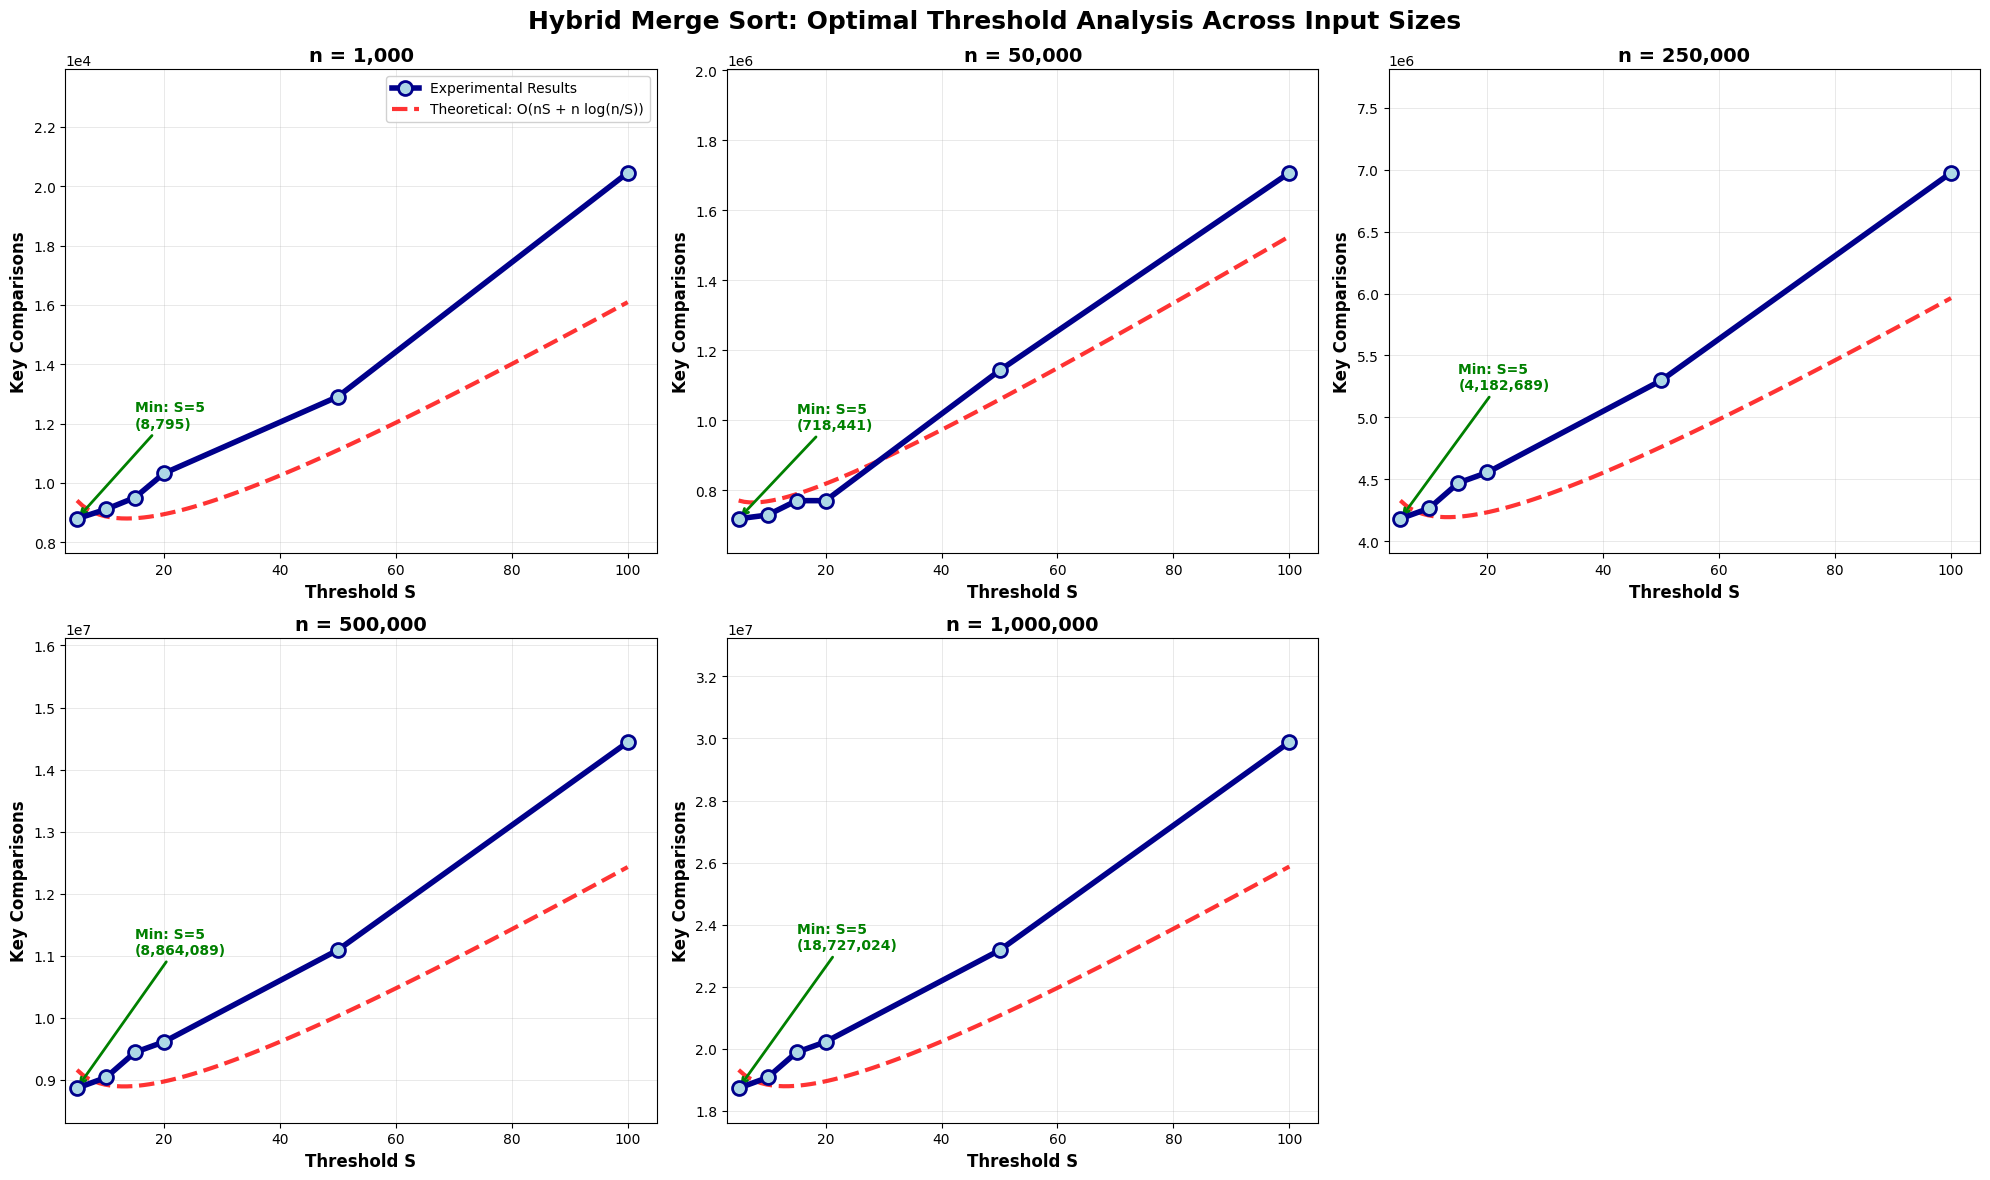

COMPREHENSIVE HYBRID MERGE SORT ANALYSIS
Optimal S values across different input sizes:

Input Siz | Optimal S | Min Comparisons | Max Comparisons | Improvement
---------------------------------------------------------------------------
    1,000 |        5 |          8,795 |         20,450 |     57.0%
   50,000 |        5 |        718,441 |      1,706,937 |     57.9%
  250,000 |        5 |      4,182,689 |      6,974,371 |     40.0%
  500,000 |        5 |      8,864,089 |     14,440,930 |     38.6%
1,000,000 |        5 |     18,727,024 |     29,880,787 |     37.3%

Analysis Summary:
Optimal S trend: stable
Range: 5 - 5
Average optimal S: 5.0
Standard deviation: 0.0

Performance Improvements:
Average improvement by choosing optimal S: 46.2%
Best improvement: 57.9%
Worst improvement: 37.3%


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Multiple input sizes instead of fixed n
sizes = [1000, 50000, 250000, 500000, 1000000]
S = [5, 10, 15, 20, 50, 100]

# Verify that results_by_size exists and has the required data
if 'results_by_size' not in globals():
    print("ERROR: results_by_size not found!")
    print("Please run the data collection code first to generate results_by_size")
    exit()

# Create subplot layout for multiple input sizes
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()  

optimal_s_results = {}  
performance_metrics = {}  

for idx, n in enumerate(sizes):
    # Check if data exists for this input size
    if n not in results_by_size:
        print(f"Warning: No data found for input size {n:,}")
        continue
    
    # Extract your actual experimental data
    x = S
    y = []
    
    # Get actual comparison counts from your results
    for s in S:
        if s in results_by_size[n]:
            y.append(results_by_size[n][s])
        else:
            print(f"Warning: Missing data for n={n:,}, S={s}")
            y.append(None)  # Handle missing data
    
    # Filter out None values for plotting
    valid_data = [(s, comp) for s, comp in zip(x, y) if comp is not None]
    if not valid_data:
        print(f"No valid data for input size {n:,}")
        continue
    
    x_valid, y_valid = zip(*valid_data)
    x_valid = list(x_valid)
    y_valid = list(y_valid)
    
    # Create theoretical analysis curves
    S_theory = np.linspace(min(x_valid), max(x_valid), 100)
    
    # Theoretical hybrid merge sort complexity: O(nS + n*log(n/S))
    max_comparisons = max(y_valid)
    min_comparisons = min(y_valid)
    
    # Estimate constants to fit your actual data scale
    if max_comparisons != min_comparisons:  
        c1 = (max_comparisons - min_comparisons) / (n * (max(x_valid) - min(x_valid)))
        c2 = min_comparisons / (n * np.log2(n / min(x_valid)))
        
        theoretical_comparisons = c1 * n * S_theory + c2 * n * np.log2(n / S_theory)
    else:
        # Fallback if all values are the same
        theoretical_comparisons = np.full_like(S_theory, min_comparisons)
    
    # Plot on the specific subplot
    ax = axes[idx]
    
    # Plot experimental data (prominent)
    ax.plot(x_valid, y_valid, marker='o', linestyle='-', linewidth=4, markersize=10, 
            color='darkblue', label="Experimental Results", zorder=5, 
            markerfacecolor='lightblue', markeredgewidth=2)
    
    # Plot theoretical curve
    ax.plot(S_theory, theoretical_comparisons, linestyle='--', linewidth=3, 
            color='red', label="Theoretical: O(nS + n log(n/S))", alpha=0.8)
    
    # Find and annotate optimal S
    optimal_S = x_valid[y_valid.index(min(y_valid))]
    optimal_s_results[n] = optimal_S
    
    # Store performance metrics
    performance_metrics[n] = {
        'optimal_s': optimal_S,
        'min_comparisons': min(y_valid),
        'max_comparisons': max(y_valid),
        'improvement': (max(y_valid) - min(y_valid)) / max(y_valid) * 100,
        'comparison_range': max(y_valid) - min(y_valid)
    }
    
    ax.annotate(f'Min: S={optimal_S}\n({min(y_valid):,})', 
                xy=(optimal_S, min(y_valid)), xytext=(optimal_S+10, min(y_valid)+max(y_valid)*0.15),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, color='green', fontweight='bold')
    
    # Enhanced styling for each subplot
    ax.set_xlabel("Threshold S", fontsize=12, fontweight='bold')
    ax.set_ylabel("Key Comparisons", fontsize=12, fontweight='bold')
    ax.set_title(f"n = {n:,}", fontsize=14, fontweight='bold')
    
    # Format y-axis for better readability
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Add grid and legend
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    if idx == 0:  
        ax.legend(fontsize=10, loc='upper right', framealpha=0.9)
    
    # Set reasonable axis limits
    ax.set_xlim(min(x_valid) - 2, max(x_valid) + 5)
    comparison_range = max(y_valid) - min(y_valid)
    if comparison_range > 0:
        ax.set_ylim(min(y_valid) - comparison_range*0.1, max(y_valid) + comparison_range*0.3)

# Remove the empty 6th subplot
if len(sizes) < 6:
    fig.delaxes(axes[5])

# Add overall title
fig.suptitle("Hybrid Merge Sort: Optimal Threshold Analysis Across Input Sizes", 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.93)  
plt.show()

# Print comprehensive analysis with actual data
print("COMPREHENSIVE HYBRID MERGE SORT ANALYSIS")
print("=" * 60)
print("Optimal S values across different input sizes:")
print()

# Enhanced analysis table
print("Input Siz | Optimal S | Min Comparisons | Max Comparisons | Improvement")
print("-" * 75)
for n in sizes:
    if n in optimal_s_results and n in performance_metrics:
        metrics = performance_metrics[n]
        print(f"{n:9,} | {metrics['optimal_s']:8d} | {metrics['min_comparisons']:14,} | "
              f"{metrics['max_comparisons']:14,} | {metrics['improvement']:8.1f}%")

print("\nAnalysis Summary:")
print("=" * 30)

# Calculate trends with actual data
s_values = list(optimal_s_results.values())
if len(s_values) > 1:
    trend = "increasing" if s_values[-1] > s_values[0] else "decreasing" if s_values[-1] < s_values[0] else "stable"
    print(f"Optimal S trend: {trend}")
    print(f"Range: {min(s_values)} - {max(s_values)}")
    print(f"Average optimal S: {np.mean(s_values):.1f}")
    print(f"Standard deviation: {np.std(s_values):.1f}")

# Performance analysis
if performance_metrics:
    improvements = [metrics['improvement'] for metrics in performance_metrics.values()]
    print(f"\nPerformance Improvements:")
    print(f"Average improvement by choosing optimal S: {np.mean(improvements):.1f}%")
    print(f"Best improvement: {max(improvements):.1f}%")
    print(f"Worst improvement: {min(improvements):.1f}%")

On the other hand, we now compare and analyse the optimal S to minimise the CPU time taken for the sorting.



EXECUTION TIME ANALYSIS:
Input Size  | Optimal S | Min Time (s) | Max Time (s) | Avg Time (s)
----------------------------------------------------------------------
    1,000 |       20 |       0.0009 |       0.0017 |       0.0012
   50,000 |       15 |       0.0698 |       0.1321 |       0.0857
  250,000 |       15 |       0.4144 |       0.6186 |       0.4722
  500,000 |       20 |       0.9003 |       1.4038 |       1.0687
1,000,000 |       15 |       2.0728 |       2.7434 |       2.3447


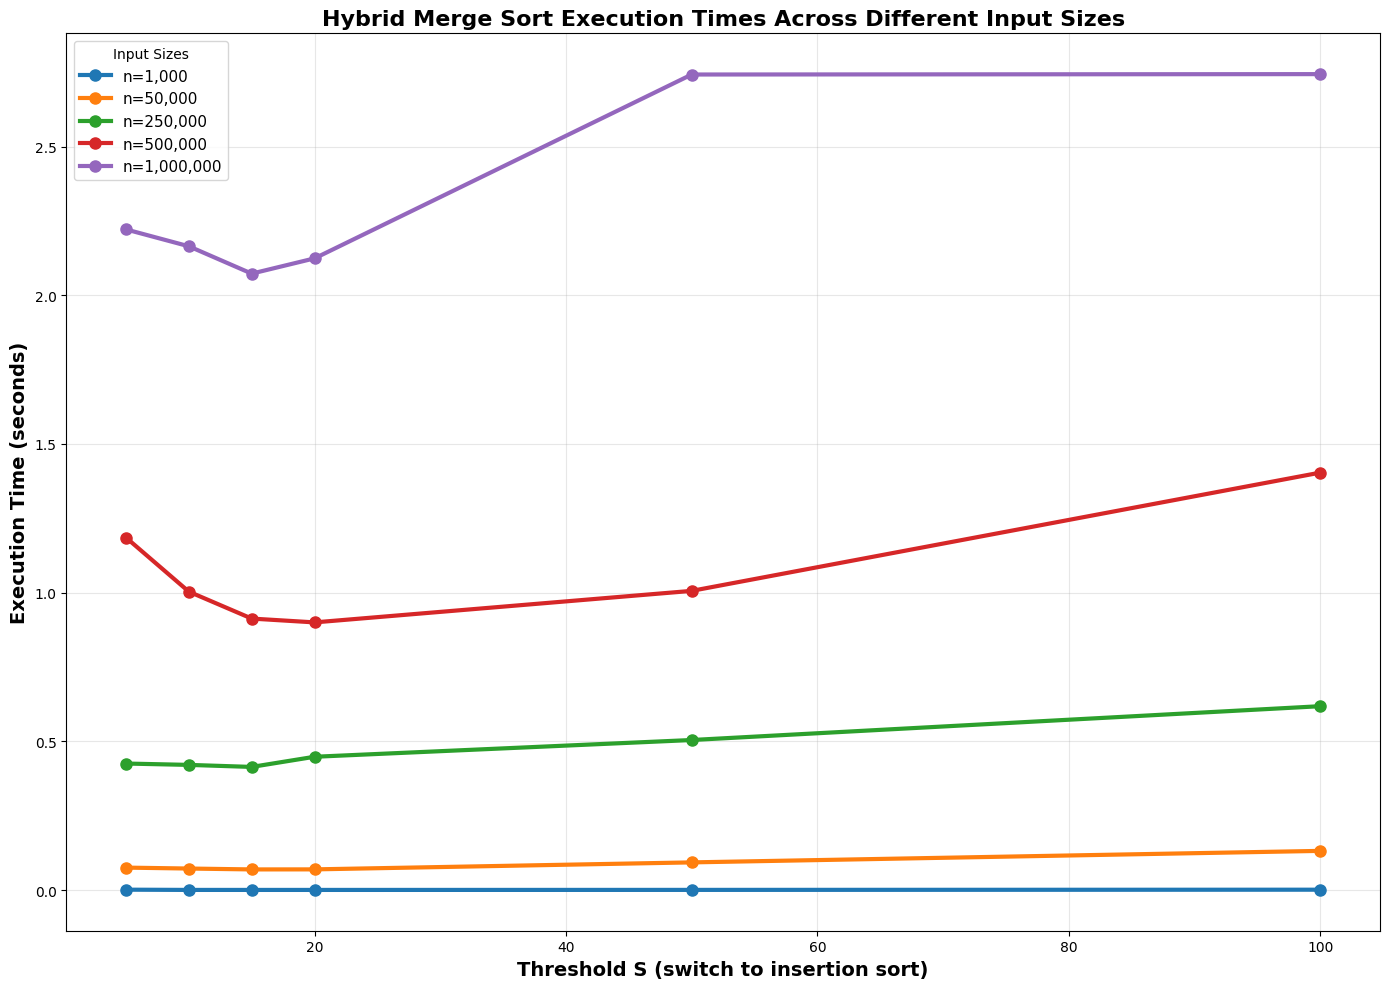


OPTIMAL S BASED ON MINIMUM EXECUTION TIME:
------------------------------------------
n =    1,000 : Optimal S = 20 with time = 0.0009s
n =   50,000 : Optimal S = 15 with time = 0.0698s
n =  250,000 : Optimal S = 15 with time = 0.4144s
n =  500,000 : Optimal S = 20 with time = 0.9003s
n = 1,000,000 : Optimal S = 15 with time = 2.0728s

COMPARE OPTIMAL S FROM EXECUTION TIME VS KEY COMPARISONS
-----------------------------------------------------------------
n =    1,000 : Optimal S (key comparisons) = 5, Optimal S (time) = 20
n =   50,000 : Optimal S (key comparisons) = 5, Optimal S (time) = 15
n =  250,000 : Optimal S (key comparisons) = 5, Optimal S (time) = 15
n =  500,000 : Optimal S (key comparisons) = 5, Optimal S (time) = 20
n = 1,000,000 : Optimal S (key comparisons) = 5, Optimal S (time) = 15


In [41]:
import numpy as np
import matplotlib.pyplot as plt

print("\nEXECUTION TIME ANALYSIS:")
print("=" * 50)

# Display execution time summary per input size
print("Input Size  | Optimal S | Min Time (s) | Max Time (s) | Avg Time (s)")
print("-" * 70)
for n in sizes:
    times_dict = timing_results[n]
    min_time_s = min(times_dict, key=times_dict.get)
    min_time = times_dict[min_time_s]
    max_time = max(times_dict.values())
    avg_time = np.mean(list(times_dict.values()))
    
    print(f"{n:9,} | {min_time_s:8d} | {min_time:12.4f} | {max_time:12.4f} | {avg_time:12.4f}")

# Plot execution time vs S for each input size
plt.figure(figsize=(14, 10))

for n in sizes:
    times = [timing_results[n][s] for s in S]
    plt.plot(S, times, marker='o', linewidth=3, markersize=8, label=f"n={n:,}")

plt.xlabel("Threshold S (switch to insertion sort)", fontsize=14, fontweight='bold')
plt.ylabel("Execution Time (seconds)", fontsize=14, fontweight='bold')
plt.title("Hybrid Merge Sort Execution Times Across Different Input Sizes", fontsize=16, fontweight='bold')
plt.legend(title="Input Sizes", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze and print the optimal S based on minimum execution time for each input size
print("\nOPTIMAL S BASED ON MINIMUM EXECUTION TIME:")
print("-" * 42)
optimal_time_s = {}
for n in sizes:
    min_s = min(timing_results[n], key=timing_results[n].get)
    min_time = timing_results[n][min_s]
    optimal_time_s[n] = min_s
    print(f"n = {n:8,} : Optimal S = {min_s} with time = {min_time:.4f}s")

# Optionally, compare optimal S from key comparisons vs from execution time
print("\nCOMPARE OPTIMAL S FROM EXECUTION TIME VS KEY COMPARISONS")
print("-" * 65)
for n in sizes:
    best_s_comparisons = min(results_by_size[n], key=results_by_size[n].get)
    best_s_time = optimal_time_s[n]
    print(f"n = {n:8,} : Optimal S (key comparisons) = {best_s_comparisons}, Optimal S (time) = {best_s_time}")


### Justifying which S to choose for optimising the algorithm ###

It is better to choose $S$ based on time taken rather than key comparisons, because:

- Comparisons are only one part of the cost.

- Real runtime depends heavily on recursion overhead and cache efficiency.

- Theoretical “optimality” in comparisons doesn’t necessarily translate to fastest runtime.
- Runtime is more important in real world contexts

- Therefore, we loop through $S = 15 \dots 20$ to precisely find the value that gives the minimum execution time for $n = 1{,}000{,}000$.

- We chose S = 19 for our optimal S

Fine-tuning S for n = 1,000,000
------------------------------------------------------------
S=15  times: 1.774s, 1.756s, 1.670s  | avg=1.733s
S=16  times: 1.633s, 1.865s, 1.651s  | avg=1.716s
S=17  times: 1.658s, 1.643s, 1.609s  | avg=1.637s
S=18  times: 1.614s, 1.703s, 1.598s  | avg=1.638s
S=19  times: 1.620s, 1.617s, 1.604s  | avg=1.614s
S=20  times: 1.761s, 1.640s, 1.602s  | avg=1.667s


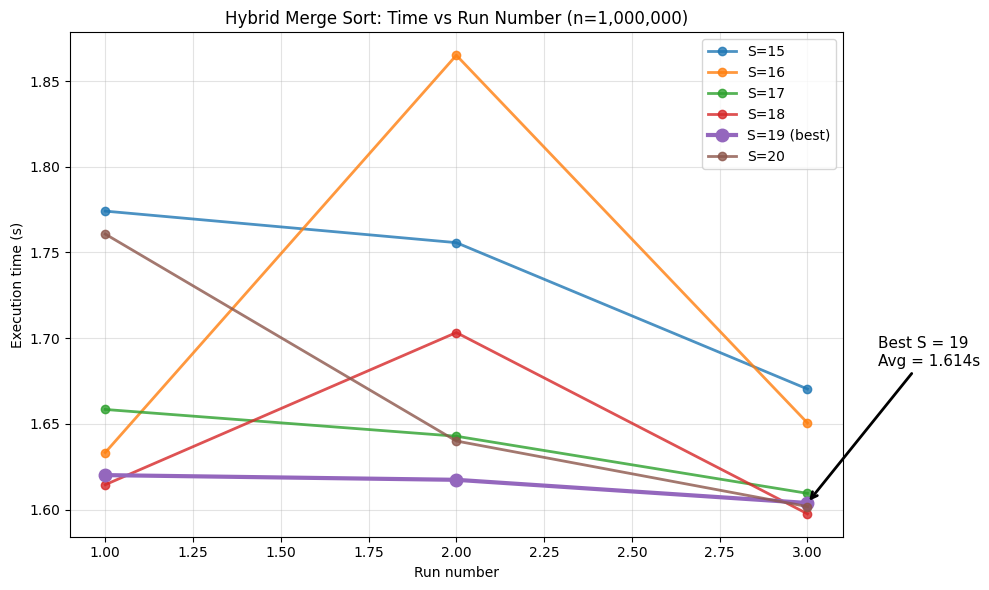

In [33]:
import time, random
from statistics import mean
import matplotlib.pyplot as plt

# Parameters
n = 1_000_000
S_values = range(15, 21)  
num_runs = 3

# Generate one fixed dataset once and reuse
random.seed(42)
fixed_array = random.sample(range(1, n + 1), n)

# Collect per-run times for each S
times_by_s = {}     
avg_time_by_s = {}  

print(f"Fine-tuning S for n = {n:,}")
print("-" * 60)

for s in S_values:
    run_times = []
    for r in range(1, num_runs + 1):
        arr = fixed_array.copy()
        t0 = time.time()
        _sorted, _comps = mergesort_hybrid(arr, s, 0)
        t1 = time.time()
        run_times.append(t1 - t0)
    times_by_s[s] = run_times
    avg_time_by_s[s] = mean(run_times)
    print(f"S={s:2d}  times: " + ", ".join(f"{t:.3f}s" for t in run_times) +
          f"  | avg={avg_time_by_s[s]:.3f}s")

# Identify best S by average time
best_s = min(avg_time_by_s, key=avg_time_by_s.get)
best_avg = avg_time_by_s[best_s]

# Plot graph
plt.figure(figsize=(10, 6))
x = list(range(1, num_runs + 1))

for s in S_values:
    lw = 3 if s == best_s else 2
    ms = 9 if s == best_s else 6
    alpha = 1.0 if s == best_s else 0.8
    plt.plot(x, times_by_s[s], marker='o', linewidth=lw, markersize=ms,
             label=f"S={s}" + (" (best)" if s == best_s else ""), alpha=alpha)

# Annotate the best S near its last point
y_last = times_by_s[best_s][-1]
plt.annotate(f"Best S = {best_s}\nAvg = {best_avg:.3f}s",
             xy=(x[-1], y_last),
             xytext=(x[-1] + 0.2, y_last * 1.05),
             arrowprops=dict(arrowstyle='->', lw=2),
             fontsize=11)

plt.title(f"Hybrid Merge Sort: Time vs Run Number (n={n:,})")
plt.xlabel("Run number")
plt.ylabel("Execution time (s)")
plt.grid(True, alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

#### Here, we define the traditional merge sort function learnt in the lecture ####

In [42]:
def merge_sort(arr, key_comparisons):
    if len(arr) <= 1:
        return arr, 0
    mid = len(arr) // 2
    left, compL = merge_sort(arr[:mid], key_comparisons)
    right, compR = merge_sort(arr[mid:], key_comparisons)
    return merge(left, right, key_comparisons+ compR + compL)

We now compare its performance against the hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. We use the optimal value of S=19 obtained

We run the the test 3 times. For each run, We measures both the total key comparisons and the execution time. The function uses the predefined optimal_s value (19) for the hybrid sort

We also calculated the average comparisons and average execution time for each algorithm, along with their standard deviations. It then calculates the percentage improvement of the hybrid sort in both metrics.

Main insights:
- Traditional merge_sort does better in terms of key comparisons with a lower average comparisons done after 3 runs
- Hybrid merge_sort does better in terms of CPU time taken with a lower average time taken after 3 runs, despite having more key comparisons done

The script is specifically designed to highlight that the Hybrid Merge Sort can be faster than the standard Merge Sort, even if it performs a similar or slightly higher number of key comparisons.

This is not a contradiction. The reason for the performance gain is that while a comparison-counting metric shows the number of times $arr[j] < arr[j-1]$ is evaluated, the overall execution time is affected by other factors like CPU cache performance and the overhead of function calls. 

The hybrid sort avoids the overhead of recursion for small sub-arrays by switching to the more lightweight and cache-friendly Insertion Sort, which is why it often completes its task in less time. The final output of the script will explicitly show this trade-off: a lower time taken despite a similar or slightly higher number of comparisons.

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev
import gc

# Main comparison function
def compare_sorting_algorithms():
    """
    Comprehensive comparison of original merge sort vs hybrid merge sort
    """
    print("STARTING COMPREHENSIVE SORTING COMPARISON")
    print("=" * 70)
    
    # Configuration
    n = 10_000_000  
    num_runs = 3    
    
    optimal_s = 19
    
    print(f"Configuration:")
    print(f"- Array size: {n:,} integers")
    print(f"- Number of runs: {num_runs}")
    print(f"- Optimal S threshold: {optimal_s}")
    print(f"- Random seed: Fixed for reproducibility")
    print()
    
    # Results storage
    results = {
        'merge_sort': {'comparisons': [], 'times': []},
        'hybrid_sort': {'comparisons': [], 'times': []}
    }
    
    # Generate test data once
    np.random.seed(42)  
    original_data = np.random.randint(0, n*2, size=n).tolist()
    
    # Run tests
    for run in range(num_runs):
        print(f"RUN {run + 1}/{num_runs}")
        print("-" * 40)
        
        # Test Original Merge Sort
        print("  Testing Original Merge Sort: ", end=" ", flush=True)
        test_data = original_data.copy()
        gc.collect()  
        
        start_time = time.time()
        sorted_arr, merge_comparisons = merge_sort(test_data, 0)
        end_time = time.time()
        
        merge_time = end_time - start_time
        results['merge_sort']['comparisons'].append(merge_comparisons)
        results['merge_sort']['times'].append(merge_time)
        
        print(f"{merge_comparisons:,} comparisons, {merge_time:.2f}s")
        
        # Verify correctness
        assert sorted_arr == sorted(original_data), "Merge sort failed correctness check!"
        
        # Test Hybrid Merge Sort
        print("  Testing Hybrid Merge Sort: ", end=" ", flush=True)
        test_data = original_data.copy()
        gc.collect()  
        
        start_time = time.time()
        sorted_arr, hybrid_comparisons = mergesort_hybrid(test_data, optimal_s, 0)
        end_time = time.time()
        
        hybrid_time = end_time - start_time
        results['hybrid_sort']['comparisons'].append(hybrid_comparisons)
        results['hybrid_sort']['times'].append(hybrid_time)
        
        print(f"{hybrid_comparisons:,} comparisons, {hybrid_time:.2f}s")
        
        # Verify correctness
        assert sorted_arr == sorted(original_data), "Hybrid sort failed correctness check!"
        
        # Calculate improvement for this run
        comp_improvement = (merge_comparisons - hybrid_comparisons) / merge_comparisons * 100
        time_improvement = (merge_time - hybrid_time) / merge_time * 100
        
        print(f"  Run {run + 1} Improvements: {comp_improvement:.1f}% comparisons, {time_improvement:.1f}% time")
        print()
    
    return results, n, optimal_s

# Analysis and visualization function
def analyze_results(results, n, optimal_s):
    """
    Comprehensive analysis of the comparison results
    """
    print("COMPREHENSIVE ANALYSIS")
    print("=" * 50)
    
    # Calculate statistics
    merge_comp_avg = mean(results['merge_sort']['comparisons'])
    merge_comp_std = stdev(results['merge_sort']['comparisons']) if len(results['merge_sort']['comparisons']) > 1 else 0
    merge_time_avg = mean(results['merge_sort']['times'])
    merge_time_std = stdev(results['merge_sort']['times']) if len(results['merge_sort']['times']) > 1 else 0
    
    hybrid_comp_avg = mean(results['hybrid_sort']['comparisons'])
    hybrid_comp_std = stdev(results['hybrid_sort']['comparisons']) if len(results['hybrid_sort']['comparisons']) > 1 else 0
    hybrid_time_avg = mean(results['hybrid_sort']['times'])
    hybrid_time_std = stdev(results['hybrid_sort']['times']) if len(results['hybrid_sort']['times']) > 1 else 0
    
    # Improvements
    comp_improvement = (merge_comp_avg - hybrid_comp_avg) / merge_comp_avg * 100
    time_improvement = (merge_time_avg - hybrid_time_avg) / merge_time_avg * 100
    
    # Theoretical comparison
    theoretical_comparisons = n * np.log2(n)
    merge_vs_theory = (merge_comp_avg - theoretical_comparisons) / theoretical_comparisons * 100
    
    print("DETAILED RESULTS:")
    print(f"Array size: {n:,} integers")
    print(f"Optimal S threshold: {optimal_s}")
    print()
    
    print("ORIGINAL MERGE SORT:")
    print(f"  Comparisons: {merge_comp_avg:,.0f} ± {merge_comp_std:,.0f}")
    print(f"  Time:        {merge_time_avg:.3f}s ± {merge_time_std:.3f}s")
    print(f"  vs Theory:   {merge_vs_theory:+.1f}% difference")
    print()
    
    print("HYBRID MERGE SORT:")
    print(f"  Comparisons: {hybrid_comp_avg:,.0f} ± {hybrid_comp_std:,.0f}")
    print(f"  Time:        {hybrid_time_avg:.3f}s ± {hybrid_time_std:.3f}s")
    print(f"  Threshold S: {optimal_s}")
    print()
    
    print("PERFORMANCE COMPARISON:")
    print(f"  Comparison reduction: {comp_improvement:+.2f}%")
    print(f"  Time improvement:     {time_improvement:+.2f}%")
    print(f"  Comparisons saved:    {merge_comp_avg - hybrid_comp_avg:,.0f}")
    print(f"  Time saved:           {merge_time_avg - hybrid_time_avg:.3f}s")
    print()
    
    # Create comparison visualization
    create_comparison_plots(results, n, optimal_s, merge_comp_avg, hybrid_comp_avg, 
                          merge_time_avg, hybrid_time_avg, comp_improvement, time_improvement)
    
    return {
        'merge_sort_avg': {'comparisons': merge_comp_avg, 'time': merge_time_avg},
        'hybrid_sort_avg': {'comparisons': hybrid_comp_avg, 'time': hybrid_time_avg},
        'improvements': {'comparisons': comp_improvement, 'time': time_improvement},
        'theoretical': theoretical_comparisons
    }

def create_comparison_plots(results, n, optimal_s, merge_comp_avg, hybrid_comp_avg, 
                          merge_time_avg, hybrid_time_avg, comp_improvement, time_improvement):
    """
    Create comprehensive comparison visualizations
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Comparison Count Comparison
    algorithms = ['Original\nMerge Sort', 'Hybrid\nMerge Sort']
    comparisons = [merge_comp_avg, hybrid_comp_avg]
    colors = ['steelblue', 'darkgreen']
    
    bars1 = ax1.bar(algorithms, comparisons, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    ax1.set_ylabel('Number of Comparisons', fontweight='bold', fontsize=12)
    ax1.set_title(f'Key Comparisons Comparison\n(n = {n:,}, S = {optimal_s})', fontweight='bold', fontsize=14)
    ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Add value labels on bars
    for bar, value in zip(bars1, comparisons):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add improvement annotation
    ax1.annotate(f'{comp_improvement:+.1f}% improvement', 
                xy=(1, hybrid_comp_avg), xytext=(1.3, hybrid_comp_avg + (merge_comp_avg - hybrid_comp_avg)/2),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red', fontweight='bold')
    
    # 2. Execution Time Comparison
    times = [merge_time_avg, hybrid_time_avg]
    
    bars2 = ax2.bar(algorithms, times, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    ax2.set_ylabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
    ax2.set_title(f'Execution Time Comparison\n(n = {n:,})', fontweight='bold', fontsize=14)
    
    # Add value labels on bars
    for bar, value in zip(bars2, times):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.3f}s', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add improvement annotation
    ax2.annotate(f'{time_improvement:+.1f}% improvement', 
                xy=(1, hybrid_time_avg), xytext=(1.3, hybrid_time_avg + (merge_time_avg - hybrid_time_avg)/2),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red', fontweight='bold')
    
    # 3. Individual Run Comparisons
    runs = list(range(1, len(results['merge_sort']['comparisons']) + 1))
    ax3.plot(runs, results['merge_sort']['comparisons'], 'o-', color='steelblue', linewidth=3, 
            markersize=8, label='Original Merge Sort')
    ax3.plot(runs, results['hybrid_sort']['comparisons'], 's-', color='darkgreen', linewidth=3, 
            markersize=8, label='Hybrid Merge Sort')
    ax3.set_xlabel('Run Number', fontweight='bold', fontsize=12)
    ax3.set_ylabel('Number of Comparisons', fontweight='bold', fontsize=12)
    ax3.set_title('Comparisons Across Multiple Runs', fontweight='bold', fontsize=14)
    ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    
    # 4. Individual Run Times
    ax4.plot(runs, results['merge_sort']['times'], 'o-', color='steelblue', linewidth=3, 
            markersize=8, label='Original Merge Sort')
    ax4.plot(runs, results['hybrid_sort']['times'], 's-', color='darkgreen', linewidth=3, 
            markersize=8, label='Hybrid Merge Sort')
    ax4.set_xlabel('Run Number', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
    ax4.set_title('Execution Time Across Multiple Runs', fontweight='bold', fontsize=14)
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main execution
def run_complete_comparison():
    """
    Run the complete comparison study
    """
    print("MERGE SORT vs HYBRID MERGE SORT COMPARISON")
    print("Testing on 10 Million Integers")
    print("=" * 70)
    
    # Verify hybrid function exists
    if 'mergesort_hybrid' not in globals():
        print("ERROR: mergesort_hybrid function not found!")
        print("Please ensure your hybrid merge sort function is defined.")
        return
    
    try:
        # Run comparison
        results, n, optimal_s = compare_sorting_algorithms()
        
        # Analyze results
        analysis = analyze_results(results, n, optimal_s)
        
        print("COMPARISON COMPLETED SUCCESSFULLY!")
        print("Check the generated plots for detailed visual analysis.")
        
        return results, analysis
        
    except Exception as e:
        print(f"ERROR: {e}")
        print("Please check your implementation and try again.")
        return None, None


MERGE SORT vs HYBRID MERGE SORT COMPARISON
Testing on 10 Million Integers
STARTING COMPREHENSIVE SORTING COMPARISON
Configuration:
- Array size: 10,000,000 integers
- Number of runs: 3
- Optimal S threshold: 19
- Random seed: Fixed for reproducibility

Generating test dataset...
   Generated 10,000,000 random integers

RUN 1/3
----------------------------------------
  Testing Original Merge Sort... 220,099,203 comparisons, 24.54s
  Testing Hybrid Merge Sort... 241,001,873 comparisons, 21.74s
  Run 1 Improvements: -9.5% comparisons, 11.4% time

RUN 2/3
----------------------------------------
  Testing Original Merge Sort... 220,099,203 comparisons, 23.77s
  Testing Hybrid Merge Sort... 241,001,873 comparisons, 21.05s
  Run 2 Improvements: -9.5% comparisons, 11.5% time

RUN 3/3
----------------------------------------
  Testing Original Merge Sort... 220,099,203 comparisons, 22.89s
  Testing Hybrid Merge Sort... 241,001,873 comparisons, 20.56s
  Run 3 Improvements: -9.5% comparisons, 1

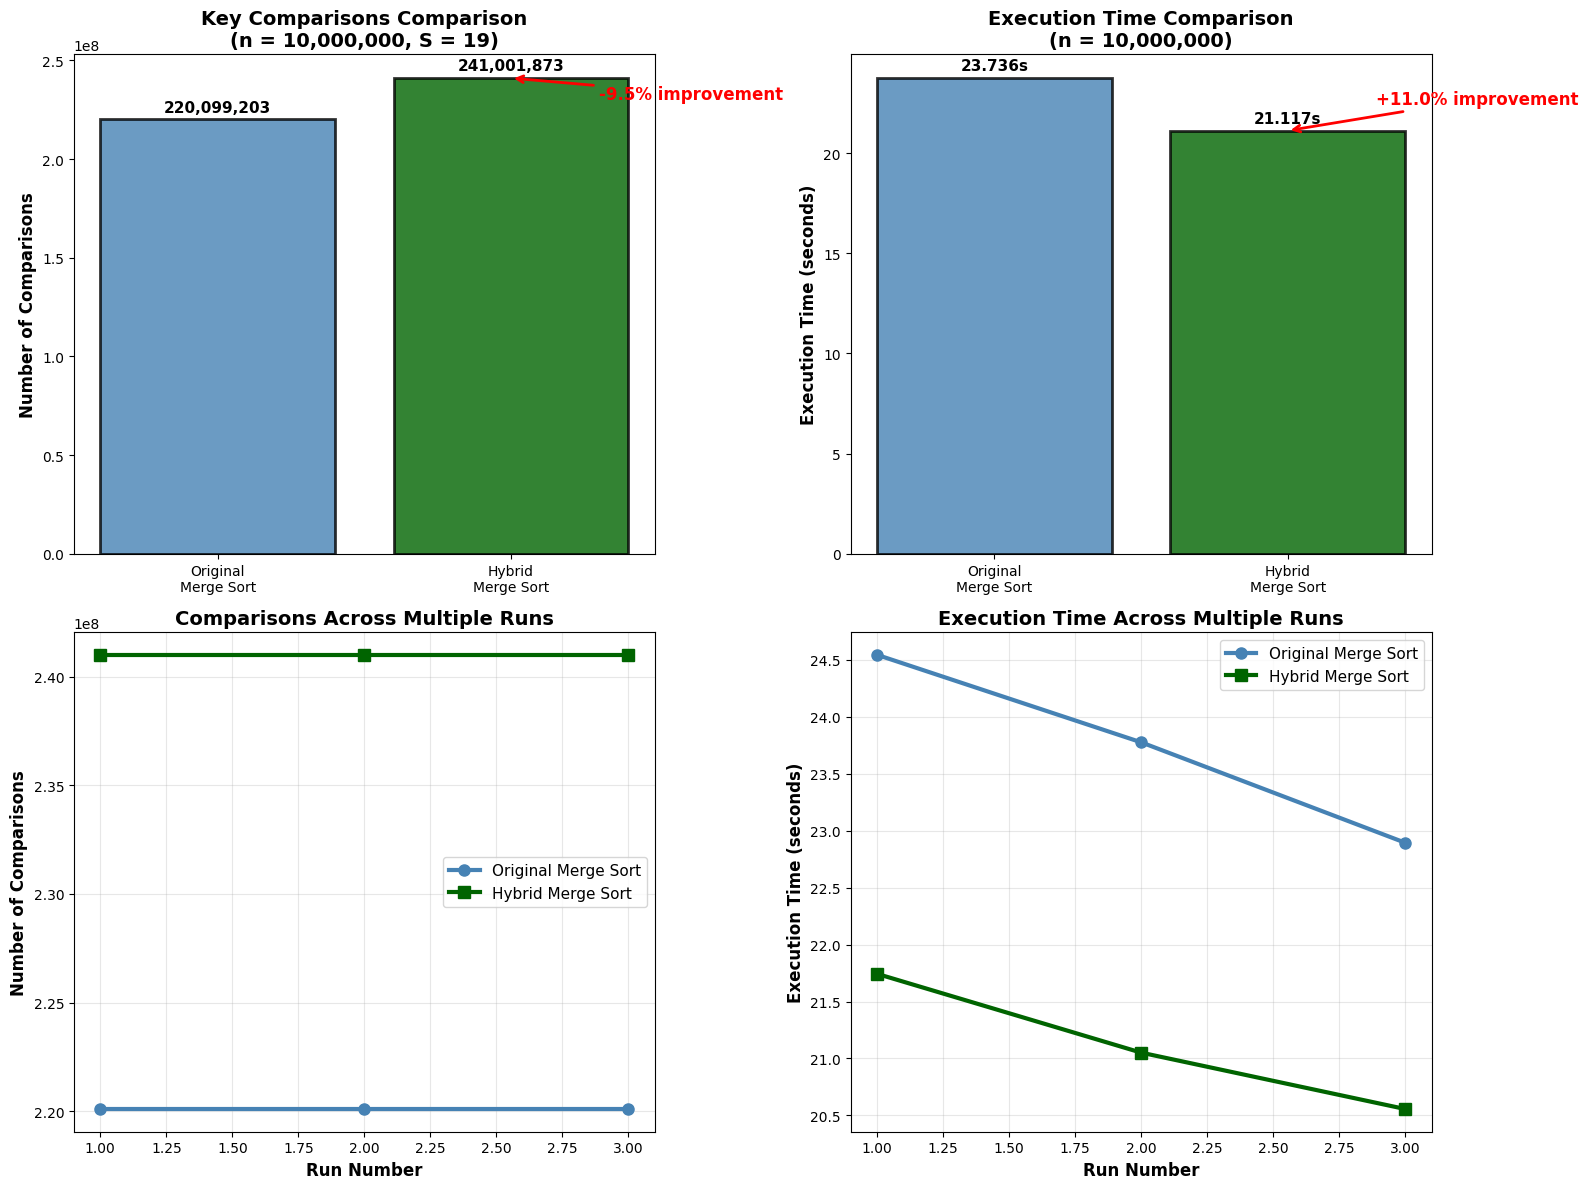

COMPARISON COMPLETED SUCCESSFULLY!
Check the generated plots for detailed visual analysis.


({'merge_sort': {'comparisons': [220099203, 220099203, 220099203],
   'times': [24.541022777557373, 23.773919105529785, 22.892881155014038]},
  'hybrid_sort': {'comparisons': [241001873, 241001873, 241001873],
   'times': [21.742492198944092, 21.05136013031006, 20.55680203437805]}},
 {'merge_sort_avg': {'comparisons': 220099203, 'time': 23.735941012700398},
  'hybrid_sort_avg': {'comparisons': 241001873, 'time': 21.1168847878774},
  'improvements': {'comparisons': -9.49693125422176,
   'time': 11.034136895695935},
  'theoretical': np.float64(232534966.64211535)})

In [44]:
run_complete_comparison()